In [12]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [13]:
df = pd.read_excel('VEF.xls')


In [14]:
df2 = (df[['Edad','VEF', 'Sexo', 'Fumador']])

#lista del fev de personas con sexo 0, fumador 0 y edad en el rango
gender= (df2['Sexo'])
smoker= (df2['Fumador'])
fev= (df2['VEF'])
age= (df2['Edad'])
lista = []
for i in range(len(df2)):
    g = gender[i]
    s = smoker[i]
    f = fev[i]
    a = age[i]
    if g == int(0) and s == int(0):
        if a>=10 and a<=14:
            lista.append(f)
#print(lista)

        

In [36]:
# fumador == 1   no fumador == 0    chico == 1    chica == 0 

def get_VEF1(df2,sexo,fumador):
    df = df2[df2['Edad'] <= 14][['Sexo','Fumador','VEF','Edad']]
    df1 = df[df['Edad'] > 10][['Sexo','Fumador','VEF','Edad']]
    
    fumadores = df1[df1['Fumador']==fumador][['Sexo','Fumador','VEF']]   
    fumadores_sexo=fumadores[fumadores['Sexo']==sexo][['Sexo',"Fumador", "VEF"]]  
    
    return (fumadores_sexo)

get_VEF1(df2,1,0)

,Sexo,Fumador,VEF
309,1,0,2.884
311,1,0,3.381
313,1,0,3.470
316,1,0,2.524
318,1,0,3.741
319,1,0,4.336
320,1,0,4.842
321,1,0,4.550
330,1,0,3.549
332,1,0,3.222


In [8]:
media_lista = np.mean(lista)
print(media_lista)

2.83722807018


In [9]:
def get_VEF(df2, sexo, fumador):
    gender= (df2['Sexo'])
    smoker= (df2['Fumador'])
    fev= (df2['VEF'])
    age= (df2['Edad'])
    lista = []
    for i in range(len(df2)):
        g = gender[i]
        s = smoker[i]
        f = fev[i]
        a = age[i]
        if g == int(sexo) and s == int(fumador):
            if a>=10 and a<=14:
                lista.append(f)
    return (lista)

# fumador == 1   no fumador == 0    chico == 1    chica == 0 

vef_chicos_fumadores= (get_VEF(df2, 1, 1))
vef_chicos_nofumadores= (get_VEF(df2, 1, 0))
vef_chicas_fumadoras= (get_VEF(df2, 0, 1))
vef_chicas_nofumadoras= (get_VEF(df2, 0, 0))



#print(vef_chicos_fumadores)
#print(vef_chicos_nofumadores)

3.67578571429


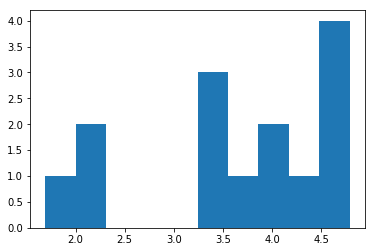

In [19]:
mean_chicos_fumadores= np.mean(vef_chicos_fumadores)
print (mean_chicos_fumadores)

plt.hist(vef_chicos_fumadores)
plt.show()

3.24809929078


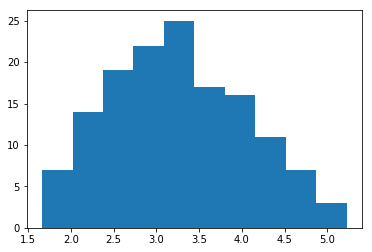

In [20]:
mean_chicos_nofumadores= np.mean(vef_chicos_nofumadores)
print (mean_chicos_nofumadores)

plt.hist(vef_chicos_nofumadores)
plt.show()

3.02322222222


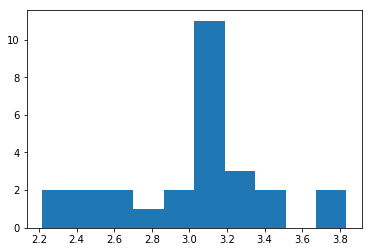

In [21]:
mean_chicas_fumadoras= np.mean(vef_chicas_fumadoras)
print(mean_chicas_fumadoras)

plt.hist(vef_chicas_fumadoras)
plt.show()

2.83722807018


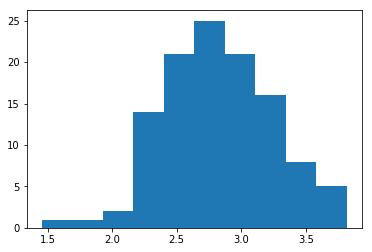

In [22]:
mean_chicas_nofumadoras= np.mean(vef_chicas_nofumadoras)
print(mean_chicas_nofumadoras)


plt.hist(vef_chicas_nofumadoras)
plt.show()

In [23]:
vef_chicas_fumadoras= (get_VEF(df2, 0, 1)) #1 vef_chicas_fumadoras
vef_chicas_nofumadoras= (get_VEF(df2, 0, 0)) #2

n_1 = len(vef_chicas_fumadoras)
n_2 = len(vef_chicas_nofumadoras)

s_1 = ss.sem(vef_chicas_fumadoras)*np.sqrt(n_1)
s_2 = ss.sem(vef_chicas_nofumadoras)*np.sqrt(n_2)


In [24]:
print(n_2)

114


In [25]:
s = np.sqrt(((n_1-1)*s_1 + (n_2-1)*s_2)/n_1+n_2-2)

In [26]:
x1_barra = np.mean(vef_chicas_fumadoras)
x2_barra = np.mean(vef_chicas_nofumadoras)

t = (x1_barra - x2_barra)/(s*np.sqrt(1/n_1+1/n_2))

In [27]:
print(t)

0.0813229324201


In [28]:
alpha = 0.05
if t > ss.t.ppf(1-alpha/2, n_1+n_2 - 2) or t < - ss.t.ppf(1-alpha/2, n_1+n_2 -2):
    print("Rechazamos H_0")
else:
    print("Aceptamos H_0")

Aceptamos H_0
